In [183]:
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(1)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [184]:
# Creating the artificial dataset
class Data2d(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.zeros(20,2)
        self.x[:,0] = torch.arange(-1,1,0.1)
        self.x[:,1] = torch.arange(-0.9,1.1,0.1)
        
#         self.w = torch.tensor([[1.0], [1.0]])
#         self.b = 1
#         self.f = torch.mm(self.x, self.w) + self.b
        
#         self.y = self.f + 0.01*torch.randn((self.x.shape[0],1))

        self.y = torch.zeros(20,1)
        self.y = torch.arange(-0.8,1.2,0.1)
        
        self.len = self.x.shape[0]
    
    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    # Getting the length
    def __len__(self):
        return self.len
# Instantiation of the class  
my_data = Data2d()

In [185]:
# Creating a linear regression model
class lin_reg(nn.Module):

    def __init__(self, in_feat, out_feat):
        super(lin_reg, self).__init__()
        self.linear = nn.Linear(in_feat, out_feat)
        
    def forward(self,x):
        yhat = self.linear(x)
        return yhat
    
# Instantiation of an object
model = lin_reg(2,1)
print("The parameters: ", model.state_dict())

The parameters:  OrderedDict([('linear.weight', tensor([[ 0.3643, -0.3121]])), ('linear.bias', tensor([-0.1371]))])


In [186]:
# Parameters
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01) 
# Training data object which loads the artificial data
trainloader = DataLoader(dataset = my_data, batch_size = 1)
# Training the model
Loss = []  # variable for storing losses after each epoch
epochs = 20
# print('Before training:')
# plane2D(model, my_data)
def train_model(epochs):
    for epoch in range(epochs):
        for x,y in trainloader:
            yhat = model(x)
            loss = criterion(yhat,y)
            Loss.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
# Calling the training function          
train_model(epochs)
# print("After training: ")
# plane2D(model, my_data, epochs)

/opt/conda/envs/pose-prediction/lib/python3.7/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


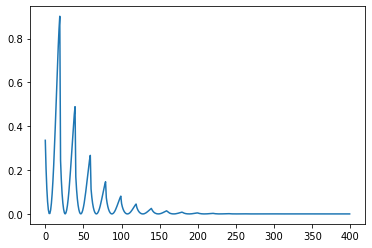

In [187]:
plt.plot(Loss)

In [188]:
for i in range(len(my_data)):
    print(my_data.x[i],my_data.y[i])


tensor([-1.0000, -0.9000]) tensor(-0.8000)
tensor([-0.9000, -0.8000]) tensor(-0.7000)
tensor([-0.8000, -0.7000]) tensor(-0.6000)
tensor([-0.7000, -0.6000]) tensor(-0.5000)
tensor([-0.6000, -0.5000]) tensor(-0.4000)
tensor([-0.5000, -0.4000]) tensor(-0.3000)
tensor([-0.4000, -0.3000]) tensor(-0.2000)
tensor([-0.3000, -0.2000]) tensor(-0.1000)
tensor([-0.2000, -0.1000]) tensor(0.)
tensor([-0.1000,  0.0000]) tensor(0.1000)
tensor([0.0000, 0.1000]) tensor(0.2000)
tensor([0.1000, 0.2000]) tensor(0.3000)
tensor([0.2000, 0.3000]) tensor(0.4000)
tensor([0.3000, 0.4000]) tensor(0.5000)
tensor([0.4000, 0.5000]) tensor(0.6000)
tensor([0.5000, 0.6000]) tensor(0.7000)
tensor([0.6000, 0.7000]) tensor(0.8000)
tensor([0.7000, 0.8000]) tensor(0.9000)
tensor([0.8000, 0.9000]) tensor(1.)
tensor([0.9000, 1.0000]) tensor(1.1000)


In [189]:
for x,y in trainloader:
        yhat = model(x)
        print('x: ',x.data)
        print('yhat: ',yhat.data)

x:  tensor([[-1.0000, -0.9000]])
yhat:  tensor([[-0.7953]])
x:  tensor([[-0.9000, -0.8000]])
yhat:  tensor([[-0.6958]])
x:  tensor([[-0.8000, -0.7000]])
yhat:  tensor([[-0.5962]])
x:  tensor([[-0.7000, -0.6000]])
yhat:  tensor([[-0.4967]])
x:  tensor([[-0.6000, -0.5000]])
yhat:  tensor([[-0.3971]])
x:  tensor([[-0.5000, -0.4000]])
yhat:  tensor([[-0.2976]])
x:  tensor([[-0.4000, -0.3000]])
yhat:  tensor([[-0.1980]])
x:  tensor([[-0.3000, -0.2000]])
yhat:  tensor([[-0.0985]])
x:  tensor([[-0.2000, -0.1000]])
yhat:  tensor([[0.0011]])
x:  tensor([[-0.1000,  0.0000]])
yhat:  tensor([[0.1006]])
x:  tensor([[0.0000, 0.1000]])
yhat:  tensor([[0.2002]])
x:  tensor([[0.1000, 0.2000]])
yhat:  tensor([[0.2997]])
x:  tensor([[0.2000, 0.3000]])
yhat:  tensor([[0.3993]])
x:  tensor([[0.3000, 0.4000]])
yhat:  tensor([[0.4989]])
x:  tensor([[0.4000, 0.5000]])
yhat:  tensor([[0.5984]])
x:  tensor([[0.5000, 0.6000]])
yhat:  tensor([[0.6980]])
x:  tensor([[0.6000, 0.7000]])
yhat:  tensor([[0.7975]])
x: 

In [190]:
new_var = Variable(torch.Tensor([[2.0,2.1]]))
model(new_var)

tensor([[2.1912]], grad_fn=<AddmmBackward>)